In [39]:
import pandas as pd
import numpy as np

# 計算Y

In [27]:
df=pd.read_excel('Y_大盤收盤價.xlsx')

In [28]:
df=df.reset_index().rename(index=str,columns={'index':'Time_index','未調整收盤價(元)':'Target'})

In [30]:
df['tomarrow'] = df.Time_index+1

In [32]:
df.head()

,Time_index,證券代碼,日期,近三月最高收盤價(元),近六月最高收盤價(元),近九月最高收盤價(元),近一年最高收盤價(元),近三月最低收盤價(元),近六月最低收盤價(元),近九月最低收盤價(元),...,55日均值,60日均值,65日均值,72日均值,125日均值,250日均值,55日最大量,65日最大量,240日最大量,tomarrow
0,0,Y9999 加權指數,2018-06-29,11251.75,11253.11,11253.11,11253.11,10488.58,10371.75,10355.76,...,147610233,145761098,143143720,142350973,137596203,128114611,8683904,8683904,10480219,1
1,1,Y9999 加權指數,2018-06-28,11251.75,11253.11,11253.11,11253.11,10488.58,10371.75,10329.94,...,147399754,144680829,142823335,141953131,137294418,128088339,8683904,8683904,10480219,2
2,2,Y9999 加權指數,2018-06-27,11251.75,11253.11,11253.11,11253.11,10488.58,10371.75,10296.45,...,147602938,144380951,143081254,141773669,137131863,127921910,8683904,8683904,10480219,3
3,3,Y9999 加權指數,2018-06-26,11251.75,11253.11,11253.11,11253.11,10488.58,10371.75,10296.45,...,147297078,143856431,143090370,141565407,136706571,127716955,8683904,8683904,10480219,4
4,4,Y9999 加權指數,2018-06-25,11251.75,11253.11,11253.11,11253.11,10488.58,10371.75,10257.02,...,146827965,143436359,142932861,141539287,136575790,127587333,8683904,8683904,10480219,5


In [34]:
target_df=pd.merge(df[['日期','Target','Time_index']],df[['Target','tomarrow']].rename(index=str,columns={'Target':'TomTarget'}),
         how='inner',left_on=['Time_index'],right_on=['tomarrow']).drop([])

In [40]:
target_df['TomarrowRatio']=target_df.TomTarget/target_df.Target
target_df['Tom_Ind'] = np.where(target_df.TomarrowRatio>=1.005,1,0)

In [43]:
target_df.to_pickle('Y_Target.p')

# 加入總經指數

In [63]:
from pandas.tseries.offsets import MonthBegin

In [51]:
Overall_eco_row = pd.read_excel('1_總經指數_12_1806.xlsx')

In [126]:
Overall_eco=pd.DataFrame(data=Overall_eco_row.年月.unique(),columns=['日期'])

In [191]:
Overall_eco['Mon_ST'] = (Overall_eco.日期) - pd.tseries.offsets.MonthBegin(n=1)

In [192]:
Overall_eco_row.shape

(17725, 4)

In [193]:
ECO_CODE_CNT= Overall_eco_row[['代碼','年月']].groupby(['代碼']).count().reset_index()
OVECO_COL_List=ECO_CODE_CNT.代碼.iloc[np.where(ECO_CODE_CNT.年月>=50)]
#OVECO_COL_List=Overall_eco_row.代碼.unique()

In [194]:
code_list=[]
for col in OVECO_COL_List:
    new_col='OV_'+col[0:col.find(' ')]
    temp_data=Overall_eco_row.iloc[np.where(Overall_eco_row.代碼==col)].reset_index().drop(['index'],
                axis=1).rename(index=str,columns={'數值':new_col})
    cod_list_temp=(new_col,col[col.find(' ')+1:])
    code_list.append(cod_list_temp)
    temp_data['Mon_ST'] = (temp_data.年月) - pd.tseries.offsets.MonthBegin(n=1)
    Overall_eco=pd.merge(Overall_eco,temp_data[['Mon_ST',new_col]],how='left',on=['Mon_ST'])

In [195]:
OV_Code_Diction=pd.DataFrame(data=code_list,columns=['CODE','DESC'])

In [196]:
Overall_eco.head(3)

,日期,Mon_ST,OV_CA05,OV_CA07G1,OV_CA2402,OV_CA29,OV_CA2913,OV_CA2930,OV_CA2965,OV_CA33,...,OV_PA0111,OV_PA0118,OV_PA0119,OV_PA0205,OV_PA0207,OV_PA0208,OV_PA0209,OV_TC0125,OV_TC0220,OV_TC0225
0,2018-06-29,2018-06-01,4.0,9.5,2.9,501612.0,1177.0,1.34,1314235.0,127.9,...,NaN,102.63,1.78,6.61,105.41,105.45,6.53,7.1,687262.0,14.6
1,2018-05-31,2018-05-01,3.8,11.4,2.8,498401.0,1329.0,1.35,1324347.0,128.8,...,NaN,102.37,1.60,5.58,104.56,104.77,5.37,11.8,732751.0,10.4
2,2018-04-30,2018-04-01,3.9,9.5,2.5,496409.0,1276.0,1.35,1314692.0,125.6,...,NaN,102.53,1.83,2.48,102.83,103.27,2.77,5.1,657376.0,0.7


# 加入市場資訊

In [142]:
marketing = pd.read_excel('0_市場統計資訊_12_1806.xlsx')

In [146]:
print(marketing.shape,marketing.年月日.min(),marketing.年月日.max())

(19165, 23) 2012-01-02 00:00:00 2018-06-29 00:00:00


In [153]:
marketing_group = ['REG997 興櫃-黃金現貨', 'Y99991 上市-整體市場', 'Y99992 上市-股票', 'Y99993 上市-基金']
marketing.證券代碼.unique()

array(['OTC991 上櫃-整體市場', 'OTC992 上櫃-股票', 'OTC993 上櫃-基金', 'OTC994 上櫃-認購權證',
       'OTC995 上櫃-認售權證', 'REG991 興櫃-整體市場', 'REG996 興櫃-LOF',
       'REG997 興櫃-黃金現貨', 'Y99991 上市-整體市場', 'Y99992 上市-股票', 'Y99993 上市-基金',
       'Y99994 上市-認購權證', 'Y99995 上市-認售權證'], dtype=object)

In [154]:
marketing_col = marketing.columns.drop(['證券代碼','年月日','成交金額'])
marketing.columns

Index(['證券代碼', '年月日', '成交金額', '成交數量', '成交筆數', '總委買數量', '總委買筆數', '總委賣數量',
       '總委賣筆數', '漲停委買數量', '漲停委買筆數', '漲停委賣數量', '漲停委賣筆數', '跌停委買數量', '跌停委買筆數',
       '跌停委賣數量', '跌停委賣筆數', '上漲家數', '下跌家數', '持平家數', '未成交家數', '漲停家數', '跌停家數'],
      dtype='object')

In [187]:
marketing.年月日.unique()

array(['2018-06-29T00:00:00.000000000', '2018-06-28T00:00:00.000000000',
       '2018-06-27T00:00:00.000000000', ...,
       '2012-01-04T00:00:00.000000000', '2012-01-03T00:00:00.000000000',
       '2012-01-02T00:00:00.000000000'], dtype='datetime64[ns]')

In [190]:
Overall_eco=pd.DataFrame(data=Overall_eco_row.年月.unique(),columns=['日期'])

In [210]:
marketing_var = pd.DataFrame(marketing.年月日.unique(),columns=['年月日'])

In [160]:
def bilist_to_dec(key_col,val_col):
    del_name = {}
    for i in range(len(key_col)):
        del_name[key_col[i]] =val_col[i]
    return del_name  

In [214]:
for group in marketing_group:
    
    new_name = [group[0:group.find(' ')]+'_'+str(t) for t in marketing.iloc[:,2:].columns]
    temp_data = marketing.iloc[np.where(marketing.證券代碼 == group)].rename(index=str,
            columns=bilist_to_dec(marketing.iloc[:,2:].columns,new_name)).reset_index().drop(['證券代碼','index'],axis=1)
    marketing_var = pd.merge(marketing_var,temp_data,how='left',on=['年月日'])
    

# 期貨三大法人交易

In [139]:
triple_c=pd.read_excel('2_期貨三大法人交易.xlsx')

In [141]:
print(triple_c.年月日.min(),triple_c.年月日.max())

2013-11-26 00:00:00 2016-06-30 00:00:00


# 資料合併

In [238]:
#marketing_var.isnull().sum()

In [289]:
model_data =pd.merge(target_df[['日期','Tom_Ind']],marketing_var,how='left',left_on=['日期'],right_on=['年月日']).drop(['年月日'],axis=1)
model_data['Mon_ST'] = (model_data.日期) - pd.tseries.offsets.MonthBegin(n=2)
model_data=pd.merge(model_data,Overall_eco.drop(['日期'],axis=1),how='left',on=['Mon_ST']).drop(['Mon_ST'],axis=1)

In [290]:
model_data.shape

(1595, 276)

In [291]:
null_cnt = pd.DataFrame(model_data.isnull().sum(),columns=['CNT'])
drop_col = model_data.columns[np.where(null_cnt.CNT>300)]
model_data=model_data.drop(drop_col,axis=1)

In [292]:
#Overall_eco

In [293]:
#null_cnt

In [294]:
from sklearn.ensemble import ExtraTreesClassifier

In [295]:
train_model_data = model_data.iloc[np.where(model_data.日期< pd.Timestamp('2018-01-01 00:00:00') )].reset_index().drop(['index'],axis=1)
test_model_data = model_data.iloc[np.where(model_data.日期>= pd.Timestamp('2018-01-01 00:00:00') )].reset_index().drop(['index'],axis=1)

In [324]:
train_X = train_model_data.iloc[:,2:]
train_Y = pd.DataFrame(train_model_data.Tom_Ind)

In [325]:
test_X = test_model_data.iloc[:,2:]
test_Y = pd.DataFrame(test_model_data.Tom_Ind)

In [301]:
#train_X.dtypes.unique()

In [299]:
#train_model_data

In [302]:
clf = ExtraTreesClassifier()
clf.fit(train_X.fillna(0), train_Y)
importances = clf.feature_importances_
#std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
#model=SelectFromModel(clf, prefit=True) 
#X_new = model.transform(X)
#Save_Column_Tree=X.columns[list(test_import)]
#Tree_end = datetime.datetime.now()

In [378]:
Save_Column=train_X.columns[indices[0:30]]

In [379]:
import catboost as cxgb

In [380]:
temp_cmodel = cxgb.CatBoostClassifier(iterations=50,depth=10,border_count=255,od_type='Iter',
                                      logging_level='Silent',
                                      feature_border_type='MinEntropy',random_seed=42)

In [381]:
temp_cmodel.fit(train_X[Save_Column].values,train_Y.Tom_Ind.values)

In [382]:
test_predict_prob = temp_cmodel.predict_proba(test_X[Save_Column])
test_predict = temp_cmodel.predict(test_X[Save_Column])

In [383]:
result = test_Y
result['pred_prob'] = test_predict_prob[:,1]
result['pred']=test_predict

In [384]:
from sklearn.metrics import classification_report

In [385]:
print(classification_report(result.pred,result.Tom_Ind))

             precision    recall  f1-score   support

        0.0       0.95      0.72      0.82       112
        1.0       0.03      0.20      0.05         5

avg / total       0.91      0.70      0.79       117



In [386]:
result = result.sort_values(by=['pred_prob'],ascending=False).reset_index(drop=True)
result['cnt']=1.0

In [387]:
result['cumsum']=result.Tom_Ind.cumsum()
result['cum_cnt']=result.cnt.cumsum()

In [388]:
result['precision']=result['cumsum']/result['cum_cnt']
result['recall'] = result['cumsum'] / result['cumsum'].max()

In [405]:
lift_data =result[['precision','recall']].groupby(['recall']).min().reset_index()

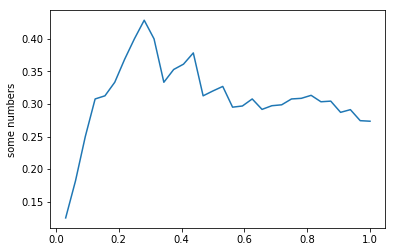

In [409]:
import matplotlib.pyplot as plt
plt.plot(lift_data.recall[1:],lift_data.precision[1:])
plt.ylabel('some numbers')
plt.show()